In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![Example Image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOQERoCnVxEcD8rXjBTEsC5Fhi7FC5gFrD7w&s)




* Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network.
* It basically detects the scanned images of handwritten digits.
* Hand written digits classification problem classifies images into 0 to 9 different images.




* Since we are using sigmoid function,the output will be in between 0 to 1.
* Feed image to neurons.
* Each pixels of the image is represented with a number 0(black) to 255(white).
* The images are in 2D arrays,so convert it into 1D arrays(flatten).

###### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

######  LOAD HANDWRITTEN DATASETS FROM KERAS LIBRARY(ALSO SPLIT THE DATASET INTO TRAIN SET AND TEST SET)

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
len(X_train)

60000

- There are 60000 different images of digits

In [6]:
len(X_test)

10000

- There are 10000 different images of digits

In [7]:
X_train[0].shape

(28, 28)

- it shows the pixel size of the image  which is 28*28

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
# it looks like a simple 2D array

###### HOW IT LOOKS LIKE?

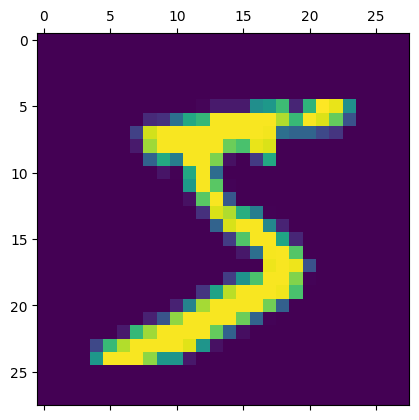

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
classes = [0,1,2,3,4,5,6,7,8,9]

In [13]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

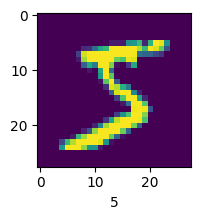

In [14]:
plot_sample(X_train,y_train,0)

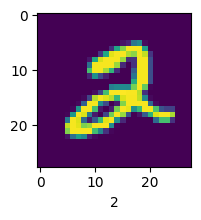

In [15]:
plot_sample(X_train,y_train,5)

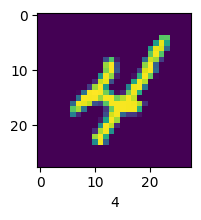

In [16]:
plot_sample(X_train,y_train,9)

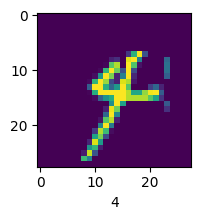

In [17]:
plot_sample(X_train,y_train,53)

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
# contains numbers between 0 and 9(including 0 & 9)

###### LET'S SCALE THE X_TRAIN AND X_TEST

Sometimes it looks like that the accuracy is very low....which may be due to the values are not scaled

In [20]:
X_train = X_train/255
X_test = X_test/255

###### LET'S FLATTEN THE TRAINING DATASET(2D TO 1D)

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [23]:
# now looks at the shape of X_train
X_train_flattened.shape

(60000, 784)

In [24]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [25]:
# now looks at the shape of X_test
X_test_flattened.shape

(10000, 784)

######  NOW LET'S CREATE A SIMPLE NEURAL NETWORK WITHOUT HIDDEN LAYERS

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
# output shape=10,there 10 outcomes

# COMPILE
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# FIT YHE MODEL
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4721 - accuracy: 0.8739
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9263


######  LET'S EVALUATE THE MODEL


In [27]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2674 - accuracy: 0.9261


[0.2674225866794586, 0.9261000156402588]

* The accuracy of our model without hidden layers is `92%`.

###### LET'S PREDICT

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.9730869e-02, 4.5183202e-07, 8.0136552e-02, 9.6450740e-01,
       2.4397774e-03, 1.1040599e-01, 1.6789546e-06, 9.9980271e-01,
       9.2803940e-02, 6.6607201e-01], dtype=float32)

In [29]:
# HAVE A LOOK AT THE MAX VALUE

In [30]:
np.argmax(y_predicted[0])

7

In [31]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

######  CONFUSION MATRIX

In [32]:
y_prediction_labels = [np.argmax(i) for i in y_predicted]
y_prediction_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction_labels)

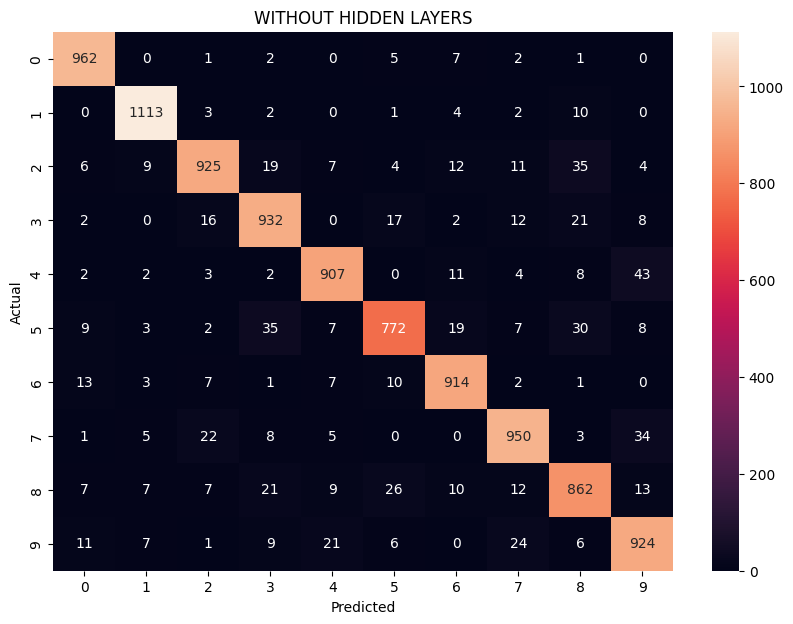

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("WITHOUT HIDDEN LAYERS")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* It shows the number of predicted values.



###### LET'S CREATE A SIMPLE NEURAL NETWORKS WITH HIDDEN LAYERS

We can flatten the model without flattening x train.....
`keras.layers.Flatten(input_shape=(784,))`

Eg:
* CREATE LAYERS

`ann = keras.Sequential([
    
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])`

* COMPILE

`ann.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])`

* FIT YHE MODEL

`ann.fit(X_train_flattened,y_train,epochs=5)`

In [35]:
ann = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

# COMPILE
ann.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# FIT YHE MODEL
ann.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 117s 62ms/step - loss: 0.3039 - accuracy: 0.9056
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1719 - accuracy: 0.9480
Epoch 3/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1405 - accuracy: 0.9563
Epoch 4/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.1247 - accuracy: 0.9614
Epoch 5/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1080 - accuracy: 0.9658


In [37]:
ann.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.1450 - accuracy: 0.9578


[0.14496831595897675, 0.9577999711036682]

* The accuracy of our model with: hidden layers is `95%`.

In [38]:
y_predicted = ann.predict(X_test_flattened)
y_prediction_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction_labels)

313/313 [==============================] - 4s 14ms/step


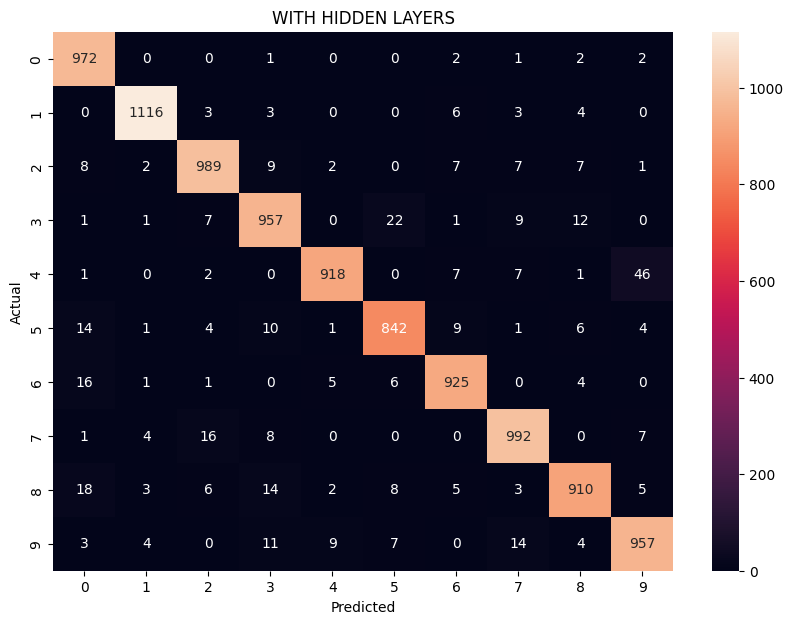

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("WITH HIDDEN LAYERS")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **CONCLUSIONS:**

- Model with hidden layers achieved 95% accuracy, 3% higher than model without hidden layers (92%).
- Hidden layers introduce non-linearity, allowing for better representation of complex data features.
- Increased model capacity benefits data and problem-solving.
- More neurons and layers store more information, learning finer details.
- Improved accuracy raises risk of overfitting, especially if dataset isn't large enough or model is too complex.
- Techniques like cross-validation, regularization, and performance evaluation are essential for monitoring overfitting.